In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

In [2]:
apple_data_raw = pd.read_csv('./data/applemobilitytrends-2021-05-07.csv')

C:\Users\mkof6\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
apple_data_raw.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,105.82,111.41,135.23,182.13,172.62,145.75,138.43,132.24,135.06,147.77
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,137.44,129.98,155.35,169.47,145.97,166.57,162.26,153.39,154.46,172.67
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,62.91,65.26,81.98,78.80,52.41,54.14,58.74,61.20,65.18,81.05
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,57.93,59.52,68.79,58.44,40.26,48.24,53.56,56.22,59.23,69.96
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,115.54,124.86,130.17,104.93,101.50,107.43,109.24,112.59,120.96,130.43


In [4]:
apple_data_raw['geo_type'].unique()

array(['country/region', 'city', 'sub-region', 'county'], dtype=object)

# First look at Country Level data

In [5]:
# It turned out that the 'country/region' is the highest level which contains the Country level data we wanted.
# So let's create a new dataframe with this level only.
# And then drop the columns that are not needed, ['geo_type','alternative_name','sub-region','country']
traffic_data = apple_data_raw[apple_data_raw['geo_type']=='country/region']
traffic_data = traffic_data.drop(columns=['geo_type','alternative_name','sub-region','country'])

In [6]:
# The data has 3 kinds of traffice info, walking, driving and transit, and as it turns out that
# not all countries have all 3 kinds of traffic info. So an easy way to deal with that will be
# to just group the data by region and take the mean value of it.

traffic_data = traffic_data.groupby('region').mean()
traffic_data.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07
region,,,,,,,,,,,,,,,,,,,,,
Albania,100.0,97.990000,100.180000,97.830000,102.200000,106.400000,93.480000,95.020000,95.925000,94.450000,...,121.630000,120.695000,145.290000,175.800000,159.295000,156.160000,150.345000,142.815000,144.760000,160.220000
Argentina,100.0,96.090000,101.910000,111.940000,117.585000,119.075000,89.990000,98.250000,100.770000,101.285000,...,60.420000,62.390000,75.385000,68.620000,46.335000,51.190000,56.150000,58.710000,62.205000,75.505000
Australia,100.0,102.023333,102.223333,104.243333,107.050000,92.070000,99.263333,105.066667,108.146667,106.103333,...,100.790000,108.410000,121.653333,99.173333,89.486667,91.950000,95.376667,97.243333,104.710000,119.006667
Austria,100.0,101.345000,104.915000,112.225000,120.295000,124.135000,97.550000,100.650000,102.985000,104.805000,...,86.765000,87.525000,88.310000,80.200000,74.400000,93.280000,96.810000,91.785000,94.595000,94.715000
Belgium,100.0,100.440000,107.646667,110.800000,123.343333,135.013333,104.976667,104.790000,110.530000,114.663333,...,108.993333,101.736667,111.156667,104.293333,98.036667,102.893333,100.246667,107.550000,105.843333,116.893333


In [7]:
# Transform the data into long form for easier plotting
traffic_data = traffic_data.reset_index().melt('region')

In [8]:
traffic_data.head()

,region,variable,value
0,Albania,2020-01-13,100.0
1,Argentina,2020-01-13,100.0
2,Australia,2020-01-13,100.0
3,Austria,2020-01-13,100.0
4,Belgium,2020-01-13,100.0


In [9]:
# Rename the columns for easier understanding
traffic_data.columns=['Country','Date','Traffic']

In [10]:
# Convert the 'Date' into Pandas's date dtype
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])

In [11]:
# Seems we've cleaned up the data, now we just need to pick the countries in interest
Country_in_Interest = ['Canada', 'France', 'Germany', 'United Kingdom', 'United States', 'Italy', 'India']

In [12]:
# Let's filter the df into only the countries that we wanted to see
# And take out the dates that Apple data are missing
traffic_data = traffic_data[traffic_data['Country'].isin(Country_in_Interest)]
traffic_data = traffic_data[~traffic_data['Date'].isin(['2020-05-11','2020-05-12', '2021-03-12'])]

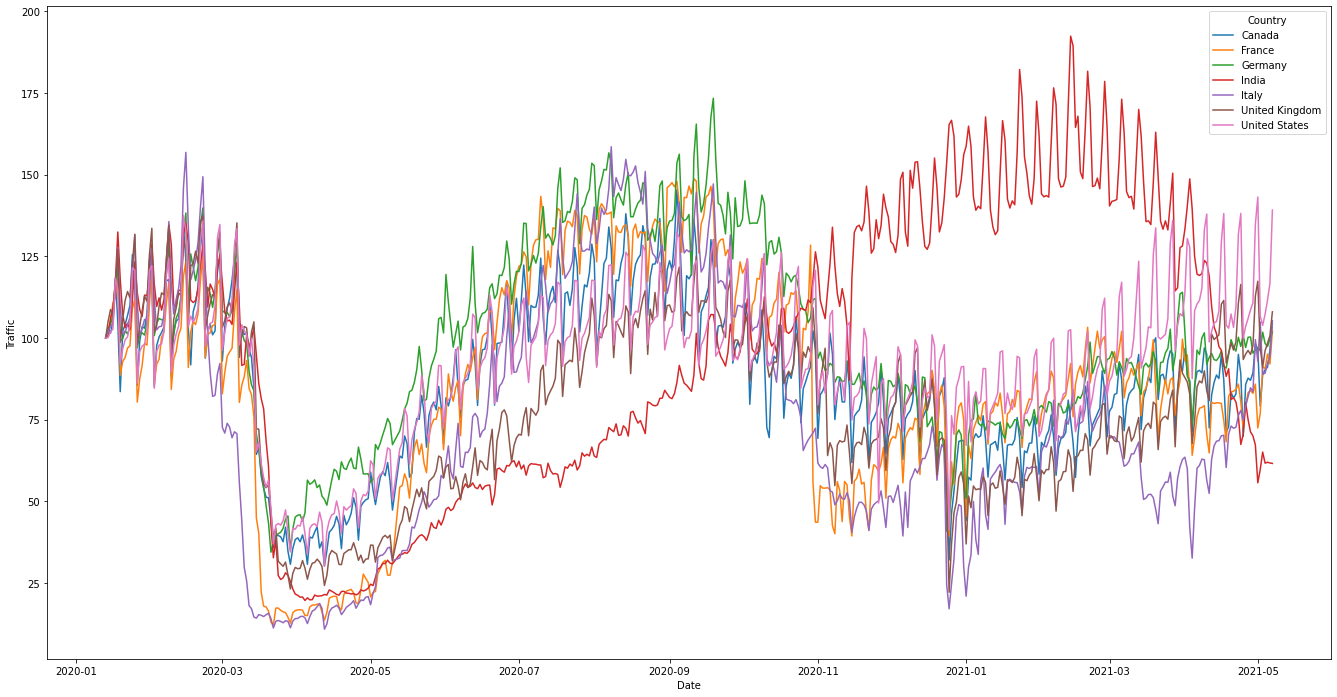

In [13]:
fig, ax = plt.subplots(figsize=(23,12))
sns.lineplot(x=traffic_data['Date'], y = traffic_data['Traffic'], hue = traffic_data['Country'], ax = ax);

It seems that most countries have a similar pattern until around 2020-09

Then while other countries have declined around that point, India's traffic kept going up until about late 2021-02, and can see an obvious drop starting 2021-03